# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [100]:
# testing response and looking at response format

url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

city = 'London'
response = requests.get(url + city).json()
response

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 279.54,
  'feels_like': 278.63,
  'temp_min': 276.21,
  'temp_max': 281.01,
  'pressure': 1026,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 220},
 'clouds': {'all': 100},
 'dt': 1665459478,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1665469033,
  'sunset': 1665508622},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try:
        response = requests.get(url + city).json()
        print(f'Processing {response["id"]}: {response["name"]}')
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except:
        print('City not found')

City not found
Processing 1636308: Manokwari
Processing 5866583: Saint Paul Harbor
Processing 1182872: Bhag
Processing 3386213: Touros
Processing 3366880: Hermanus
Processing 3421719: Narsaq
Processing 2206939: Bluff
Processing 5106841: Albany
Processing 3489440: Morant Bay
Processing 964432: Port Alfred
Processing 3517970: Pochutla
Processing 1507390: Dikson
Processing 527321: Mezen'
Processing 2063036: Port Lincoln
Processing 2270385: Camacha
Processing 2013639: Verkhnevilyuysk
Processing 350203: Rosetta
Processing 3369157: Cape Town
Processing 1735799: Sri Aman
Processing 3833367: Ushuaia
Processing 6201424: Mataura
Processing 4032243: Vaini
Processing 2027044: Batagay
Processing 3874787: Punta Arenas
Processing 6089245: Norman Wells
Processing 1735106: George Town
Processing 1282256: Hithadhoo
Processing 3531865: Cadereyta
Processing 4362001: Mayo
Processing 5969025: Haines Junction
Processing 3382160: Cayenne
Processing 1062663: Mahajanga
Processing 1487939: Uvat
Processing 217391

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
data = {
    'City': city_name,
    'Latitude': lat,
    'Longitude': lng,
    'Temperature': max_temp,
    '% Humidity': humidity,
    '% Cloudiness': cloudiness,
    'Wind Speed': wind_speed
}
weather_df = pd.DataFrame(data)
weather_df

,City,Latitude,Longitude,Temperature,% Humidity,% Cloudiness,Wind Speed
0,Manokwari,-0.8667,134.0833,299.35,75,100,1.07
1,Saint Paul Harbor,57.7900,-152.4072,285.88,67,20,7.72
2,Bhag,29.0415,67.8239,302.17,20,0,1.91
3,Touros,-5.1989,-35.4608,299.55,76,8,6.95
4,Hermanus,-34.4187,19.2345,295.26,56,100,2.81
...,...,...,...,...,...,...,...
539,Punta Cardon,11.6581,-70.2150,303.18,67,12,10.80
540,Gunjur,13.2019,-16.7339,300.19,83,20,0.00
541,Kodinsk,58.6881,99.1844,278.54,90,96,2.70
542,Taylor,32.3001,-99.8337,296.85,64,100,2.57


In [56]:
weather_df.to_csv('../output_data/weather_data.csv', encoding='utf-8', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
x = weather_df[weather_df['% Humidity'] > 100]
x

# I found that there are no rows where the humidity is greater than 100% by running this

,City,Latitude,Longitude,Temperature,% Humidity,% Cloudiness,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

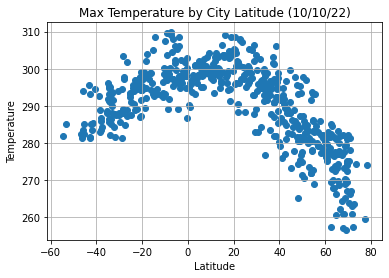

In [57]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

plt.title("Max Temperature by City Latitude (10/10/22)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/MaxTemperatureByLatitude.png")

plt.show()

In [ ]:
# This plot is showing the relationship between the max temperature and latitude by each city in the sample. 
# As expected, the max temperature for cities closer to the equator (latitude = 0) is higher than cities farther from the equator.

## Latitude vs. Humidity Plot

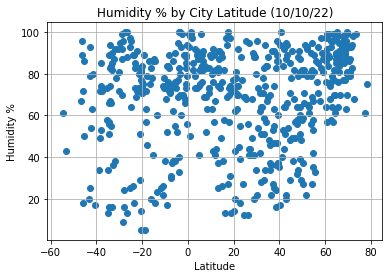

In [58]:
plt.scatter(weather_df["Latitude"], weather_df["% Humidity"], marker="o")

plt.title("Humidity % by City Latitude (10/10/22)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/HumidityByLatitude.png")

plt.show()

In [ ]:
# This plot shows the humidity in each city based on latitude.
# It appears a lot of other factors impact humidity more than latitude alone.

## Latitude vs. Cloudiness Plot

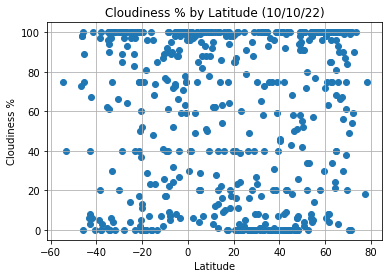

In [59]:
plt.scatter(weather_df["Latitude"], weather_df["% Cloudiness"], marker="o")

plt.title("Cloudiness % by Latitude (10/10/22)")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/CloudinessByLatitude.png")

plt.show()

In [ ]:
# This plot shows the cloud cover by latitude.
# It seems like there are a lot of cities on either extreme (very cloudy or no clouds at all) and a lot fewer data points between 0 & 100% coverage.

## Latitude vs. Wind Speed Plot

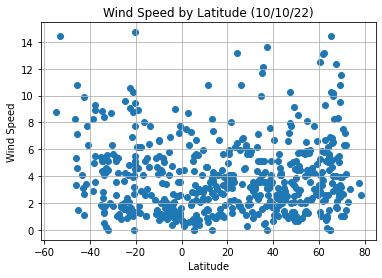

In [76]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

plt.title("Wind Speed by Latitude (10/10/22)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/WindSpeedByLatitude.png")

plt.show()

In [ ]:
# This plot shows the wind speed in different cities by latitude.
# It seems to me that latitude doesn't have very much effect on wind speed.

## Linear Regression

In [62]:
northern_hemi = weather_df[weather_df['Latitude'] >= 0]
southern_hemi = weather_df[weather_df['Latitude'] < 0]

,City,Latitude,Longitude,Temperature,% Humidity,% Cloudiness,Wind Speed
0,Manokwari,-0.8667,134.0833,299.35,75,100,1.07
3,Touros,-5.1989,-35.4608,299.55,76,8,6.95
4,Hermanus,-34.4187,19.2345,295.26,56,100,2.81
6,Bluff,-46.6000,168.3333,282.47,67,73,8.25
9,Port Alfred,-33.5906,26.8910,293.25,84,99,1.79
...,...,...,...,...,...,...,...
528,Coxim,-18.5067,-54.7600,302.13,57,81,1.76
532,Luau,-10.7073,22.2247,296.30,22,87,1.49
536,Morondava,-20.2833,44.2833,297.48,84,0,4.53
537,Ariquemes,-9.9133,-63.0408,307.42,38,77,0.73


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

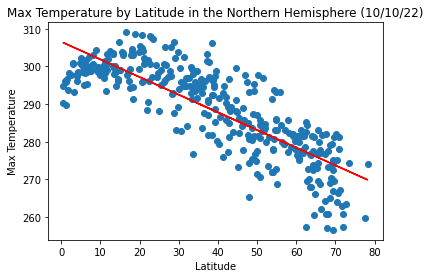

The correlation between Latitude and Temperature in the Northern Hemisphere is -0.8280676249437278
363


In [97]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Temperature"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Max Temperature by Latitude in the Northern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Temperature in the Northern Hemisphere is {correlation}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

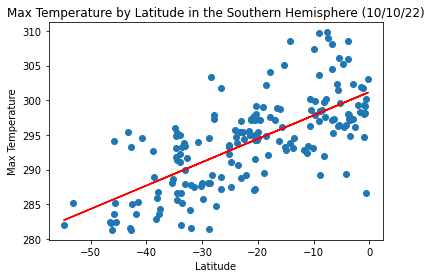

The correlation between Latitude and Temperature in the Southern Hemisphere is 0.7008941006834659


In [99]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Max Temperature by Latitude in the Southern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Temperature in the Southern Hemisphere is {correlation}')

In [96]:
# The linear regression here shows that there is a decently strong correlation between latitude and max temperature.\
# The correlation is stronger in the Northern Hemisphere than it is in the Southern but that is likely due to the fact
# that the Northern Hemisphere has significantly more data points than the Southern Hemisphere (363 vs 181, respectively).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

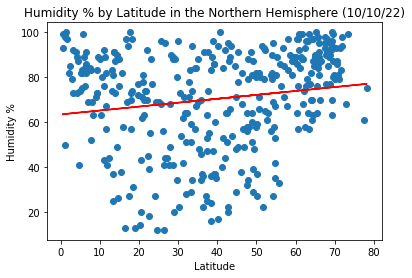

The correlation between Latitude and Humidity in the Northern Hemisphere is 0.16452976303152295


In [89]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["% Humidity"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity % by Latitude in the Northern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Humidity in the Northern Hemisphere is {correlation}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

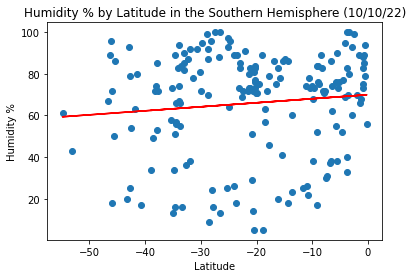

The correlation between Latitude and Humidity in the Southern Hemisphere is 0.10560062480313993


In [90]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["% Humidity"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity % by Latitude in the Southern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Humidity in the Southern Hemisphere is {correlation}')

In [ ]:
# The correlation between latitude and % humidity is extremely weak, almost non existent.
# The hemispheres both have about the same correlation so my conclusion is that humidity is dictated by factors other than latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

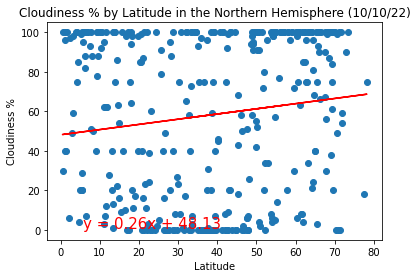

The correlation between Latitude and Cloudiness in the Northern Hemisphere is 0.13714516650923672


In [91]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["% Cloudiness"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness % by Latitude in the Northern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Cloudiness in the Northern Hemisphere is {correlation}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

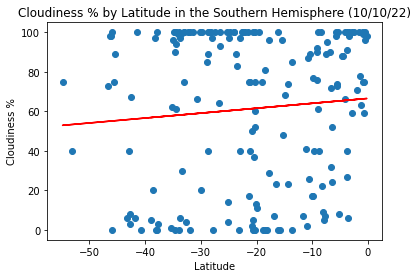

The correlation between Latitude and Cloudiness in the Southern Hemisphere is 0.08677078190725071


In [92]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["% Cloudiness"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness % by Latitude in the Southern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Cloudiness in the Southern Hemisphere is {correlation}')

In [ ]:
# The correlation between latitude and cloudiness is also extremely weak.
# The same thing can be said for both hemispheres: cloudiness is dictated by factors other than latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

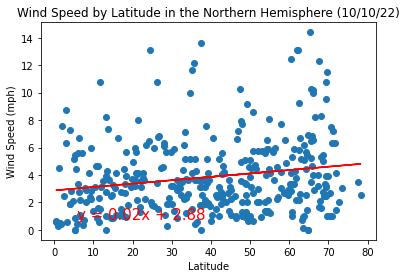

The correlation between Latitude and Wind Speed in the Northern Hemisphere is 0.19229940741616086


In [93]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed by Latitude in the Northern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Wind Speed in the Northern Hemisphere is {correlation}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

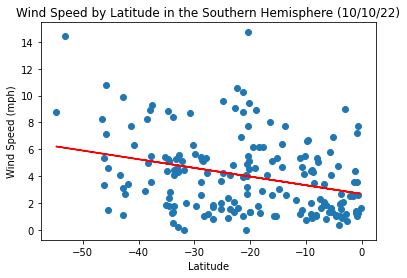

The correlation between Latitude and Wind Speed in the Southern Hemisphere is -0.3088555689792725


In [94]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]
correlation = x_values.corr(y_values, method='pearson')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed by Latitude in the Southern Hemisphere (10/10/22)')
plt.show()
print(f'The correlation between Latitude and Wind Speed in the Southern Hemisphere is {correlation}')

In [ ]:
# The correlation between latitude and wind speed is also pretty weak. There is a small correlation but nothing that makes the impression latitude causes a difference in wind speed.
# It does appear that wind speed increases a bit the further a city is from the equator.

In [ ]:
# Observations

# The temperature appears to be in Kelvin (as far as I can tell) and not in Celsius or Fahrenheit. That is interesting to me.

# The only factor dictated heavily by latitude is max temp

# No other factor had a strong enough r value to deem their relationship to latitude as significant.